<center><u><h1>Assignment 8:- GRU AND Bidirectional LSTM RNN</center></u></h1>

![](https://c.tenor.com/tM6pDOQYblQAAAAC/welcome-back-awesome.gif)

##Gated Recurrent Unit (GRU)<br>
A gated recurrent unit (GRU) is part of a specific model of recurrent neural network that intends to use connections through a sequence of nodes to perform machine learning tasks associated with memory and clustering, for instance, in speech recognition. Gated recurrent units help to adjust neural network input weights to solve the vanishing gradient problem that is a common issue with recurrent neural networks.
![](https://production-media.paperswithcode.com/methods/780px-Gated_Recurrent_Unit_type_1.svg.png)

Refer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU


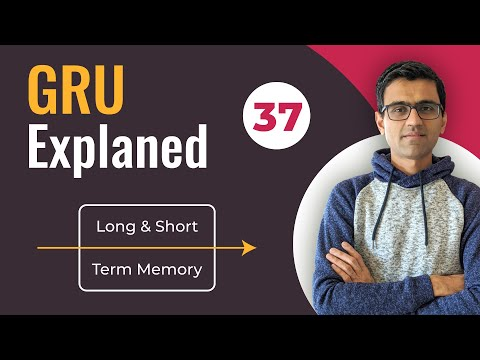

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('tOuXgORsXJ4', width=600, height=300)

###Architecture of Gated Recurrent Unit:<br>

Here we have a GRU cell which more or less similar to an LSTM cell or RNN cell.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-14-24-12.png)

At each timestamp t, it takes an input Xt and the hidden state Ht-1 from the previous timestamp t-1. Later it outputs a new hidden state Ht which again passed to the next timestamp.
###The first gate is the Reset gate and the other one is the update gate.

1. Reset Gate (Short term memory)
The Reset Gate is responsible for the short-term memory of the network i.e the hidden state (Ht). Here is the equation of the Reset gate.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-14-34-17.png)

The value of rt will range from 0 to 1 because of the sigmoid function. Here Ur and Wr are weight matrices for the reset gate.

2. We have an Update gate for long-term memory and the equation of the gate is shown below.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-15-13-00.png)

The only difference is of weight metrics i.e Uu and Wu.


Refer:https://keras.io/api/layers/recurrent_layers/gru/

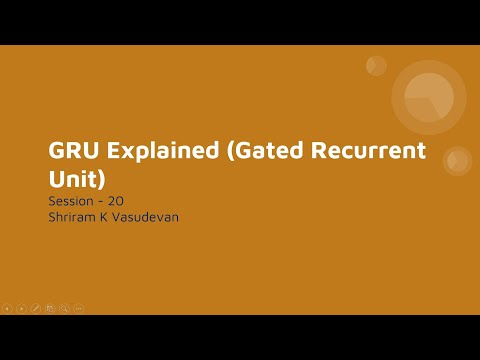

In [ ]:
###Refer Video
YouTubeVideo('xLKSMaYp2oQ', width=600, height=300)

###Applications of GRU:<br>
Gated Recurrent Unit can be used to improve the memory capacity of a recurrent neural network as well as provide the ease of training a model. The hidden unit can also be used for settling the vanishing gradient problem in recurrent neural networks. <br>
It can be used in various applications, including speech signal modelling, machine translation, handwriting recognition, among others.

#Bidirectional LSTM RNN

To enable straight (past) and reverse traversal of input (future), Bidirectional RNNs, or BRNNs, are used. A BRNN is a combination of two RNNs - one RNN moves forward, beginning from the start of the data sequence, and the other, moves backward, beginning from the end of the data sequence. The network blocks in a BRNN can either be simple RNNs, GRUs, or LSTMs.<br>

when we are dealing with long sequences of data and the model is required to learn relationship between future and past word as well. we need to send data in that manner. To solve this problem bidirectional network was introduced.

Let’s take an example, assume we are having a sentence like<<br>
![](https://miro.medium.com/max/609/0*u1exzGPAtza4D50o.gif)

Here we can not predict the next word with normal RNN network but this can be solved in bidirectional RNN network. Also, RNN network can be LSTM or GRU.

Refer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

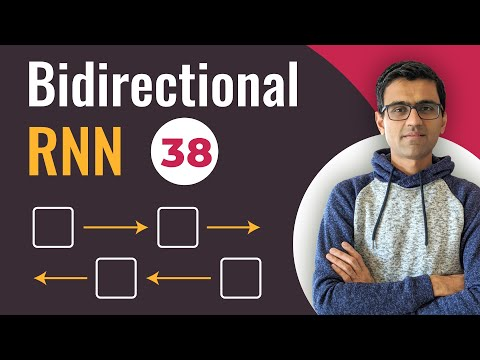

In [ ]:
###Refer Video
YouTubeVideo('atYPhweJ7ao', width=600, height=300)

In bidirectional LSTM we give the input from both the directions from right to left and from left to right . Make a note this is not a backward propagation this is only the input which is given from both the side. So, the question is how the data is combined in output if we are having 2 inputs.

![](https://miro.medium.com/max/700/0*ZsTT3zzTNGF-6OsR.jpg)

Generally in normal LSTM network we take output directly as shown in first figure but in bidirectional LSTM network output of forward and backward layer at each stage is given to activation layer which is a neural network and output of this activation layer is considered. This output contains the information or relation of past and future word also.

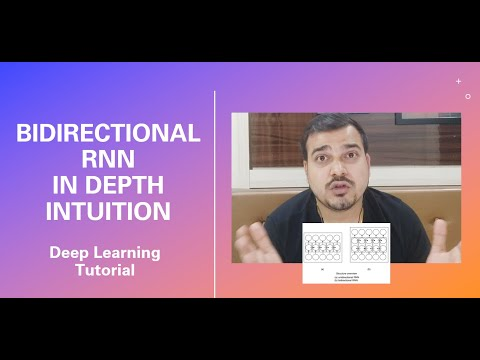

In [ ]:
###Refer Video
YouTubeVideo('D-a6dwXzJ6s', width=600, height=300)

Applications
BRNN is useful for the following applications:
1. Handwriting Recognition
2. Speech Recognition
3. Dependency Parsing
4. Natural Language Processing Tasks.




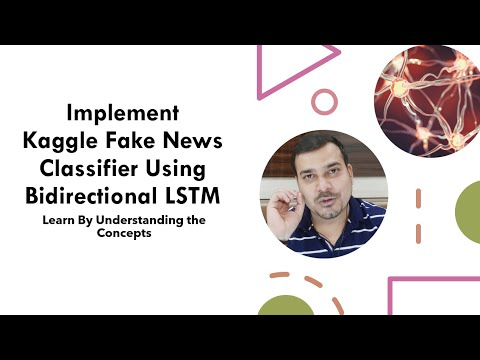

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('RpTmnRGJvRQ', width=600, height=300)

##Implementation of Bidirectional LSTMs on Tensorflow
BiDirectional LSTMs use two LSTMs to train on sequential input. The first LSTM is used on the input sequence as it is. The second LSTM is used on a reversed representation of the input sequence. It helps in supplementing additional context and makes our model fast.

Developing a Deep learning model to identify when an article might be fake news.Here we are using kaggle dataset.

we will import the necessary libraries.<br>
1. **Pandas** for data analysis,<br>
2. **Numpy** for calculating N-dimensional array,<br>
3. **Tensorflow** is used for multiple tasks but has a particular focus on the training and inference of deep neural networks and  Keras acts as an interface for the TensorFlow library.<br>
4. We’ll need word embeddings i.e **Embedding, Dense,LSTM layers and Bidirectional**.<br>
5. We’ll have to pad them with zeroes  by using  **pad_sequences** in order to make them of equal length.<br>
6. we will need **One-hot** encodes a text into a list of word indexes of size n.<br>
7. As we’ll stack all layers on top of each other with model.add, we need **Sequential** for constructing our model.<br>
8. It is time to split our data by using **train_test_split** from sklearn helps us to do that. It will split the data into training and testing data.
9. Importing **nltk, re, Stopwords,Poterstemmer** for nlp preprocessing.<br>
10. finally to check the **accuary** and **confusion matrix** of our model.




In [ ]:
# Import above mentioned Libraries


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


we will define our dataset and then we will see our dataset for overview.


You can download the dataset from here:<br>
https://drive.google.com/file/d/1OazFCF5yHlQPPXiwFA2DuUQ7OnKlUXQp/view?usp=sharing

In [ ]:
#loading dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/NLP_CLoudyML/NLP_Cloudy/Assignment 8/train.csv')

In [ ]:
#partial view of dataset from top


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#dimension of dataset i.e shape of dataset

(20800, 5)

In this dataset there are 20800 rows and 5 columns. There are some categorical and some numerical columns present.

Now its time to preprocess the data,
firstly we will observe the dataset, this means we have to see the data types of the columns. we will check the dataset information using the info() method.

In [ ]:
#basic dataset information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


You can see that the datatypes of each column, number of rows present with non-null values, there are many int float, and remaining are string datatype columns.

Now we will summarize the statistical part by using describe method.

In [ ]:
#basic statistics symmary


,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


Now we have to check for null values, for this, we use the pandas IsNull() method which will give True if the null value is present and False when there are no null values.

In [ ]:
#checking for missing values


id           0
title      558
author    1957
text        39
label        0
dtype: int64

We will drop the null values using the dropna method.

In [ ]:
#dropping Null Values using dropna function


We have deleted all null values so that it can not affect the accuracy of the model . Now we will define X and Y as an independent and dependent variable

In [ ]:
#Create a variable for independent feature and take axis=1

#Create a variable for dependent feature 


The key part of NLP is text preprocessing which we perform on independent variable using NLTK library. We will use re library to remove punctuations then we will pass the data from stop words list and then do stemming on the data.
First,we will create a copy of independent feature to use them in preprocessing and then we will use  reset_index method to set index of list from ranging 0 to length of that list.After that we will using the re library for removing the punctutions in the dataset. As we have done the preprocessing in previous assignment same we have to do the prepocessing here in this cell.

In [ ]:
#create copy of independent variable 

#reset the index 

#create the porterstemmer object

#create a list to append preproccessed sentence

#By using Re Expression for preprocessing the data[DOne in previous assignment]








#here we can see that corpus contains the words after preprocessing done.


['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

Now we will one hot encode the data as we have word list and we will get the index w.r.t vocab_size.One-hot encodes a text into a list of word indexes of size n.<br>
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot

In [ ]:
#create vocab size = 5000 

#by using one hot function 

#printing first 10 sentences.


[[4312, 4027, 4022, 3985, 2645, 1451, 2683, 1493, 3691, 3026],
 [4786, 2811, 4817, 929, 4421, 3949, 2667],
 [1794, 151, 934, 3387],
 [763, 414, 2859, 1880, 3557, 4206],
 [3300, 4421, 1528, 1175, 3941, 3451, 4421, 2447, 3077, 571],
 [3474,
  3248,
  1572,
  4068,
  1020,
  2070,
  2265,
  2105,
  2554,
  570,
  1848,
  2280,
  3702,
  3846,
  2667],
 [4752, 1009, 2634, 4155, 203, 3988, 269, 640, 4869, 3753, 3438],
 [4735, 951, 3321, 3668, 3183, 1738, 2070, 3375, 4869, 3753, 3438],
 [3377, 3037, 4875, 1681, 2154, 3769, 3661, 523, 2070, 1394],
 [3940, 3759, 3928, 4959, 4385, 1251, 2837, 1934]]

Next step is padding, as the sentences we have are different in size so we have to do padding to make them equal in length. We can use pre or post padding.
Here we are pre padding and setting length to 30.
Refer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

In [ ]:
#create length set to 30

#Creating pad sequences and passing parameters are onehot,length and padding=pre

#printing first 10 values


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 4312, 4027,
        4022, 3985, 2645, 1451, 2683, 1493, 3691, 3026],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 4786, 2811, 4817,  929, 4421, 3949, 2667],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 1794,  151,  934, 3387],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  763,  414, 2859, 1880, 3557, 4206],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 3300, 4421,
        1528, 1175, 3941, 3451, 

From above all output we can see that how our sentences are preprocessed for the LSTM input. Now we can implement model to train on our data.
We will adding all the hidden layers in the cell.
We can then define the  model. we can initialize the model variable with Sequential().
The first layer is an Embedding layer, which learns a word embedding that in our case has a dimensionality of 40.
This is followed by an Bidirectional LSTM layer providing the recurrent segment, and a Dense layer that has one output through Sigmoid a number between 0 and 1.

In [ ]:
#setting embedding_vector_features=40 

## Define the Keras model and intialize with sequential()

#intialize first layer for embedding with vocab_size,embedding_vector_features and length

#intialize another layer with LSTM for 100

#adding dense layer with 1 output and having activation function of sigmoid


The model can then be compiled. We do so by specifying the optimizer, the loss function, and the metrics that we had specified before.

In [ ]:
# Compile the model


This is also a good place to generate a summary of what the model looks like.

In [ ]:
#printing the summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


Making into pad sequences sentences into numpy array to pass them in training same goes with denpendant feature i.e y

In [ ]:
#converting into numpy array and store them in X for pad sequence sentences

#converting into numpy array and store them in Y for dependant Feature i.e y 


Split the data into training and testing dataset by using train_test_split from sklearn. After spliting, The model is ready for training :).<br>
Training the model,we can instruct TensorFlow to start the training process.

In [ ]:
#spliting the data using train_test_split from sklearn 

# Train the model X train, Y train, batch size=64 , epochs=5 ,and validation data is X test and Y test.


Epoch 1/5
192/192 [==============================] - 12s 29ms/step - loss: 0.3293 - accuracy: 0.8414 - val_loss: 0.1958 - val_accuracy: 0.9157
Epoch 2/5
192/192 [==============================] - 5s 24ms/step - loss: 0.1456 - accuracy: 0.9407 - val_loss: 0.1917 - val_accuracy: 0.9186
Epoch 3/5
192/192 [==============================] - 5s 24ms/step - loss: 0.1018 - accuracy: 0.9623 - val_loss: 0.2108 - val_accuracy: 0.9181
Epoch 4/5
192/192 [==============================] - 5s 24ms/step - loss: 0.0853 - accuracy: 0.9691 - val_loss: 0.2593 - val_accuracy: 0.9026
Epoch 5/5
192/192 [==============================] - 5s 24ms/step - loss: 0.0639 - accuracy: 0.9778 - val_loss: 0.2749 - val_accuracy: 0.9132


We can test our model finally on testing data and can check the confusion metrix.

In [ ]:
#predict the X test 

#Printing confusion matrix


[[3118  301]
 [ 223 2393]]


In [ ]:
#printing the Accuracy Score


91.31731565865783


We got accuracy of 91%. However, we can improve this accuracy by working on different parameters like vocab_size, sentence length, LSTM layer size, number of epochs.

![](https://c.tenor.com/0wGsnKiXsmsAAAAM/hurray-happy.gif)

Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.